#                Virat Kohli Performance Prediction On ODI

# Importing Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model

# Importing Dataset

In [2]:
vk=pd.read_csv("vkuse.csv")

In [3]:
vk.head(1)

,match,Runs,BF,SR,fours,sixes,Opposition,Ground
0,1,12,22,54.54,1,0,v Sri Lanka,Dambulla


# Finding relation between columns 

<AxesSubplot:xlabel='Runs', ylabel='fours'>

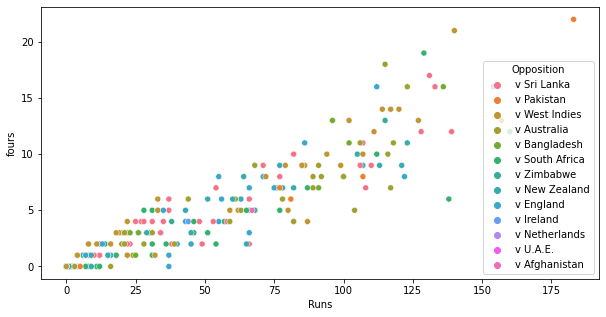

In [4]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=vk.Runs,y=vk.fours,hue=vk.Opposition)

<AxesSubplot:xlabel='BF', ylabel='fours'>

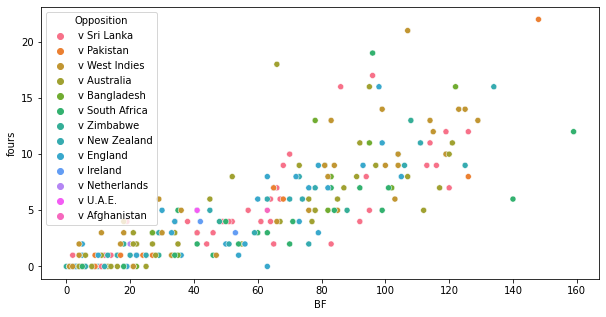

In [5]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=vk.BF,y=vk.fours,hue=vk.Opposition)

<AxesSubplot:xlabel='Opposition', ylabel='Runs'>

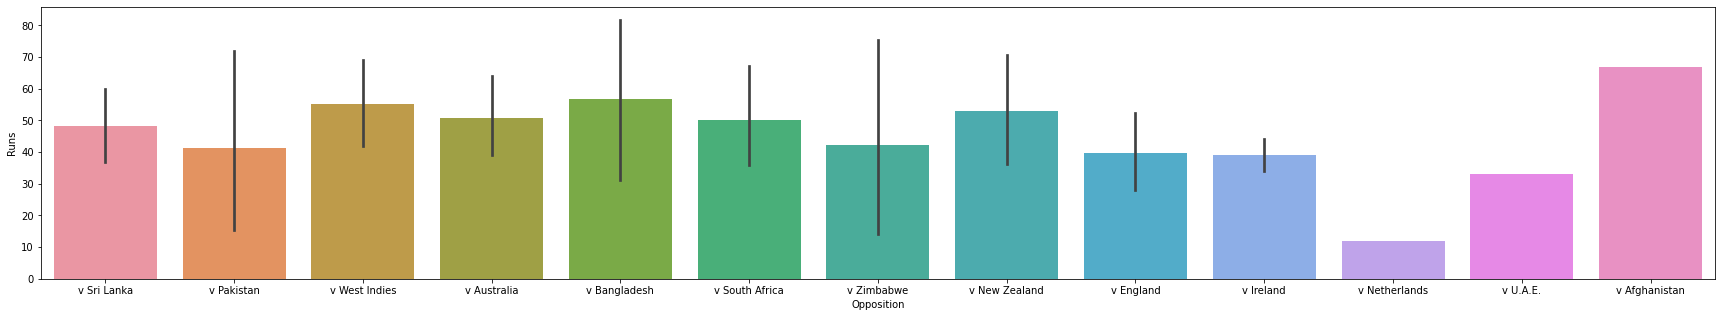

In [6]:
plt.figure(figsize=(30,5))
sns.barplot(x=vk.Opposition,y=vk.Runs)

<AxesSubplot:xlabel='fours', ylabel='Runs'>

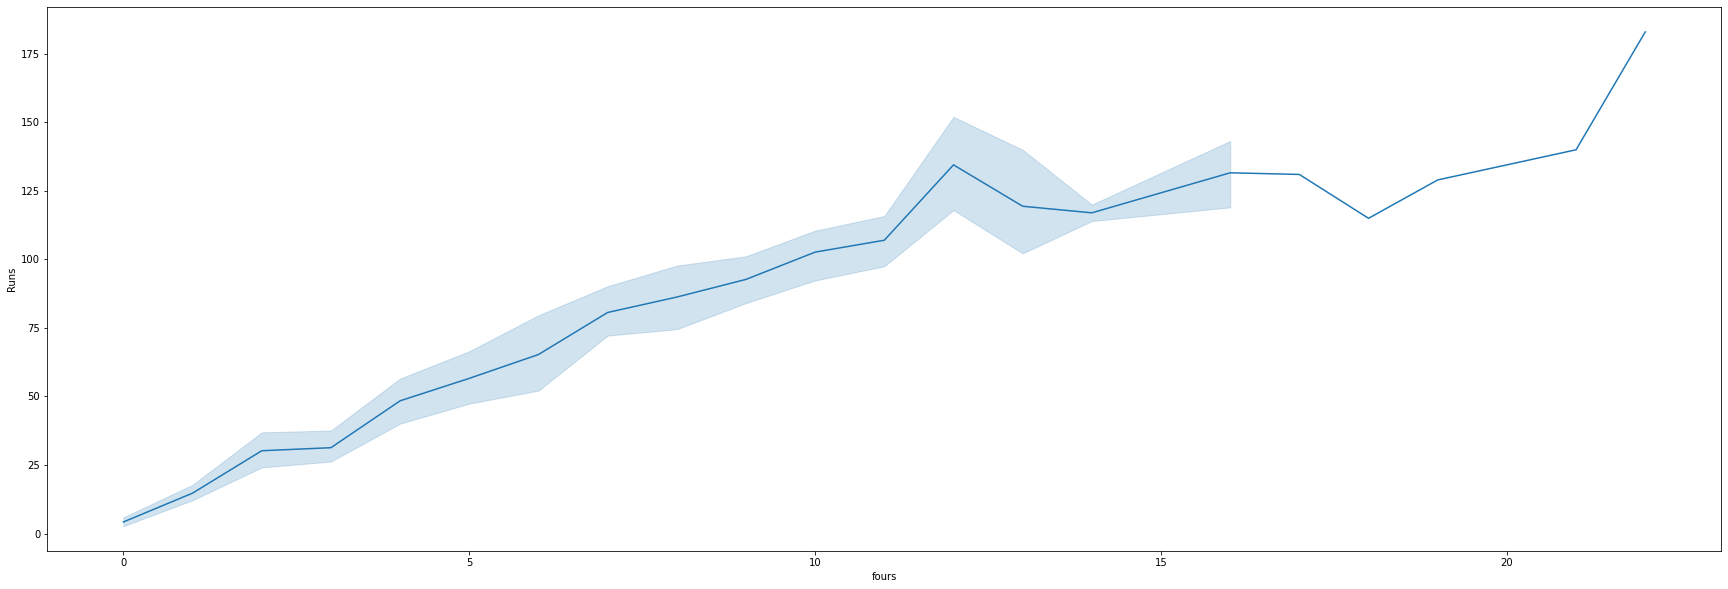

In [7]:
plt.figure(figsize=(30,10))
sns.lineplot(x=vk.fours,y=vk.Runs)

<AxesSubplot:xlabel='BF', ylabel='Runs'>

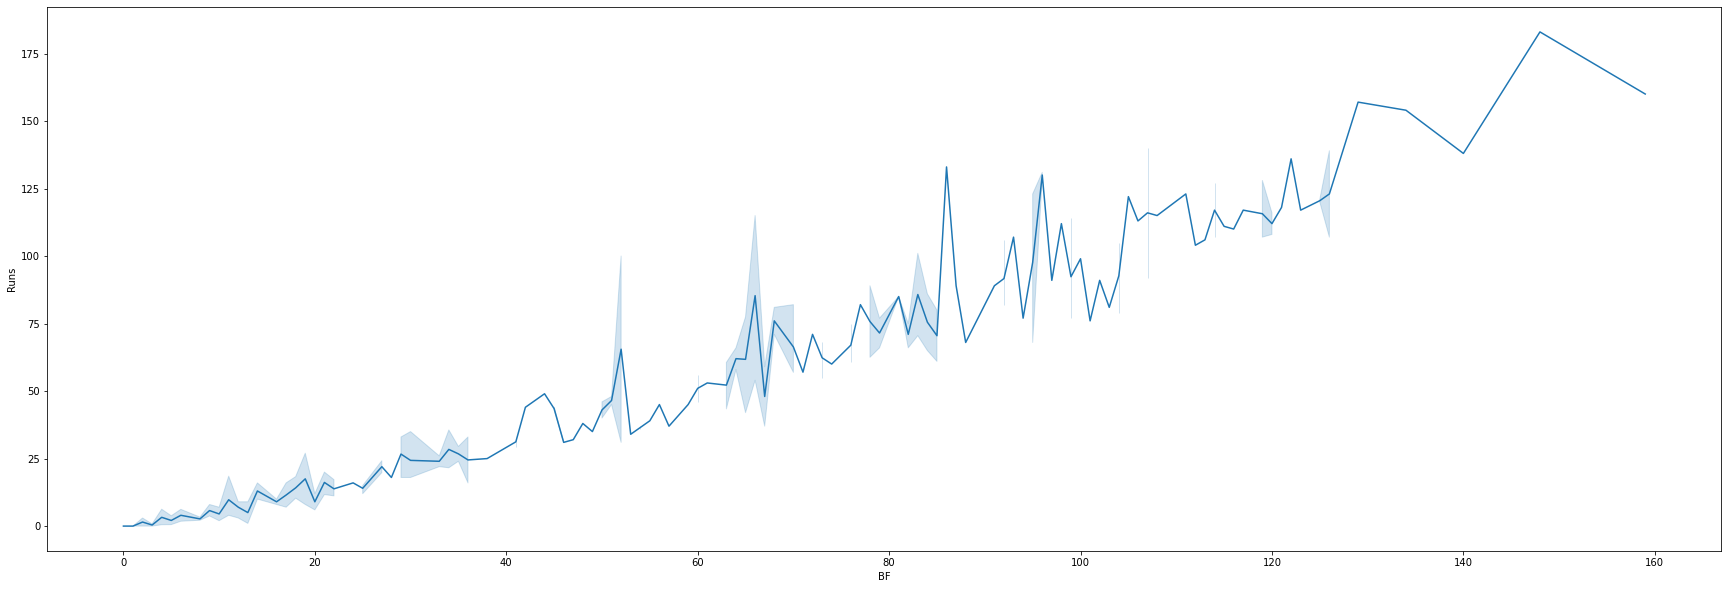

In [8]:
plt.figure(figsize=(30,10))
sns.lineplot(x=vk.BF,y=vk.Runs)

<AxesSubplot:xlabel='sixes', ylabel='Runs'>

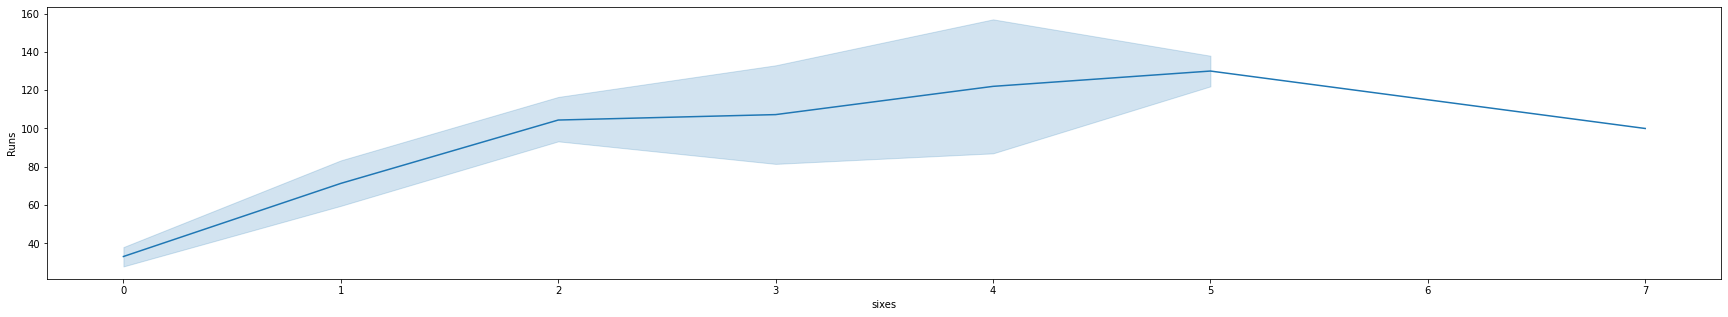

In [9]:
plt.figure(figsize=(30,5))
sns.lineplot(x=vk.sixes,y=vk.Runs)

# 1 : Predicting Number of fours scored on the basis of Runs

# Appying Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr=LinearRegression()

In [12]:
r=vk[['Runs','BF']]
f=vk[['fours']]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
r_train,r_test,f_train,f_test=train_test_split(r,f,test_size=0.4)

In [15]:
lr.fit(r_train,f_train)

LinearRegression()

# Finding R2 score and Predicting Output

In [16]:
r2_score = lr.score(r_test,f_test)

In [17]:
print(r2_score*100,'%')

87.55202967898302 %


In [18]:
lr.predict([[36,23]])

array([[4.75492694]])

# 2 : Predicting Runs Going to score on basis of Opposition, Ball-faced and Fours

In [19]:
vk.head()

,match,Runs,BF,SR,fours,sixes,Opposition,Ground
0,1,12,22,54.54,1,0,v Sri Lanka,Dambulla
1,2,37,67,55.22,6,0,v Sri Lanka,Dambulla
2,3,25,38,65.78,4,0,v Sri Lanka,Colombo (RPS)
3,4,54,66,81.81,7,0,v Sri Lanka,Colombo (RPS)
4,5,31,46,67.39,3,1,v Sri Lanka,Colombo (RPS)


In [20]:
vk['Opposition'].value_counts()

v Sri Lanka       46
v West Indies     41
v Australia       40
v England         33
v South Africa    28
v New Zealand     26
v Pakistan        13
v Bangladesh      12
v Zimbabwe         6
v Ireland          2
v Netherlands      1
v U.A.E.           1
v Afghanistan      1
Name: Opposition, dtype: int64

# One Hot encoding and data cleaning

In [21]:
vk.head()

,match,Runs,BF,SR,fours,sixes,Opposition,Ground
0,1,12,22,54.54,1,0,v Sri Lanka,Dambulla
1,2,37,67,55.22,6,0,v Sri Lanka,Dambulla
2,3,25,38,65.78,4,0,v Sri Lanka,Colombo (RPS)
3,4,54,66,81.81,7,0,v Sri Lanka,Colombo (RPS)
4,5,31,46,67.39,3,1,v Sri Lanka,Colombo (RPS)


In [22]:
vk_en=pd.get_dummies(data=vk,columns=['Opposition'])

In [23]:
vk_en.head()

,match,Runs,BF,SR,fours,sixes,Ground,Opposition_v Afghanistan,Opposition_v Australia,Opposition_v Bangladesh,Opposition_v England,Opposition_v Ireland,Opposition_v Netherlands,Opposition_v New Zealand,Opposition_v Pakistan,Opposition_v South Africa,Opposition_v Sri Lanka,Opposition_v U.A.E.,Opposition_v West Indies,Opposition_v Zimbabwe
0,1,12,22,54.54,1,0,Dambulla,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,37,67,55.22,6,0,Dambulla,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,25,38,65.78,4,0,Colombo (RPS),0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,54,66,81.81,7,0,Colombo (RPS),0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,31,46,67.39,3,1,Colombo (RPS),0,0,0,0,0,0,0,0,0,1,0,0,0


# Dropping columns with less values 

In [24]:
vk_final=vk_en.drop(columns=['Opposition_v Ireland','Opposition_v Netherlands','Opposition_v Afghanistan','Opposition_v Zimbabwe','Opposition_v U.A.E.','Ground','SR','match']) 

In [25]:
vk_final.head()

,Runs,BF,fours,sixes,Opposition_v Australia,Opposition_v Bangladesh,Opposition_v England,Opposition_v New Zealand,Opposition_v Pakistan,Opposition_v South Africa,Opposition_v Sri Lanka,Opposition_v West Indies
0,12,22,1,0,0,0,0,0,0,0,1,0
1,37,67,6,0,0,0,0,0,0,0,1,0
2,25,38,4,0,0,0,0,0,0,0,1,0
3,54,66,7,0,0,0,0,0,0,0,1,0
4,31,46,3,1,0,0,0,0,0,0,1,0


# Applying Random Forest

In [26]:

xf=vk_final[['BF','fours','sixes','Opposition_v Australia','Opposition_v Bangladesh','Opposition_v England','Opposition_v New Zealand','Opposition_v Pakistan','Opposition_v South Africa','Opposition_v Sri Lanka','Opposition_v West Indies']]

In [27]:
yf=vk_final['Runs']

In [28]:
xf_train,xf_test,yf_train,yf_test=train_test_split(xf,yf,test_size=0.3)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rfg=RandomForestRegressor()

In [31]:
rfg.fit(xf_train,yf_train)

RandomForestRegressor()

# Predicting the Output and Checking R2 score

In [32]:
rfg.predict([['200','10','5''0','0','0','0','0','1','0','0','0']])

array([157.84])

In [33]:
r2_score = rfg.score(xf_test,yf_test)
print(r2_score*100,'%')

95.29538203358877 %


# 1 (Predicting Fours) accuracy -> 86% 
# 2 (Predicting Runs) accuracy ->  96%